# PMF, CDF, Joint Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Farbod Khodadadi Aski

*SID:* 810102545

The objective of this notebook is to understand the concepts of PMF and CDF and joint distribution.

In [32]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(545)

## Parameters

In [3]:
num_counters = 1
arrival_rate = 5  # customers per minute
service_rate = 6 # customers per minute
simulation_time = 10000  # minutes

## Simulation

In [4]:
def simulate_queue_system():
    """
    Simulates a queue system with customers arriving at service counters, waiting for service, and being served.

    This function defines the customer behavior and the setup of the simulation environment. It initializes the simulation environment, sets up the service counters, and continuously generates customer arrivals based on specified arrival and service rates. The function runs the simulation until the specified simulation time and returns the recorded wait times, arrival times, and service times of the customers.

    Returns:
        tuple: A tuple containing three lists - wait_times, arrival_times, and service_times, which record the respective times for each customer in the simulation.
    """

    def customer(
        env: simpy.Environment,
        name: str,
        counter: simpy.Resource,
        service_time: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Simulates a customer arriving at a service counter, waiting for service, and then being served.

        Args:
            env (simpy.Environment): The simulation environment.
            name (str): The name of the customer.
            counter (simpy.Resource): The service counter resource.
            service_time (float): The time it takes to serve the customer.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Process: The process of the customer being served.
        """
        arrival_time = env.now
        arrival_times.append(arrival_time)
        with counter.request() as req:
            yield req
            yield env.timeout(service_time)
            service_times.append(service_time)
            wait_time = env.now - arrival_time
            wait_times.append(wait_time)

    def setup(
        env: simpy.Environment,
        num_counters: int,
        arrival_rate: float,
        service_rate: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Sets up the simulation environment with a specified number of service counters and customer arrival and service rates.

        Args:
            env (simpy.Environment): The simulation environment.
            num_counters (int): The number of service counters available.
            arrival_rate (float): The rate at which customers arrive.
            service_rate (float): The rate at which customers are served.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Timeout: The timeout event for the next customer arrival.
        """
        counter = simpy.Resource(env, num_counters)
        while True:
            yield env.timeout(np.random.exponential(1 / arrival_rate))
            service_time = np.random.exponential(1 / service_rate)
            env.process(
                customer(
                    env,
                    "Customer",
                    counter,
                    service_time,
                    wait_times,
                    arrival_times,
                    service_times,
                )
            )

    while True:
        env = simpy.Environment()
        wait_times = []
        arrival_times = []
        service_times = []
        env.process(
            setup(
                env,
                num_counters,
                arrival_rate,
                service_rate,
                wait_times,
                arrival_times,
                service_times,
            )
        )
        env.run(until=simulation_time)

        if len(wait_times) == len(arrival_times) == len(service_times):
            return wait_times, arrival_times, service_times
        
wait_times, arrival_times, service_times = simulate_queue_system()

## Plot the RVs Distributions
KDE(Kernel Density Estimation) estimates the pdf of a random function.
if we use "kde=True" , histplot with also draw the estimate pdf of our function giving us a better understanting of the shape of our hist and how should it look like.

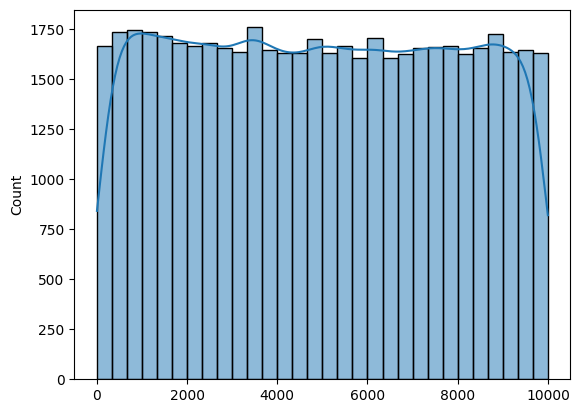

In [6]:
######################  TODO  ########################
# Distribution of Arrival Times
sns.histplot(arrival_times, bins=30, kde=True);
######################  TODO  ########################

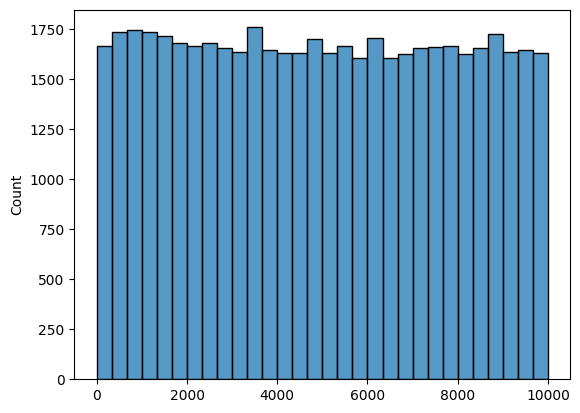

In [7]:
######################  TODO  ########################
# Distribution of Arrival Times with kde=false
sns.histplot(arrival_times ,bins=30,kde=False);
######################  TODO  ########################

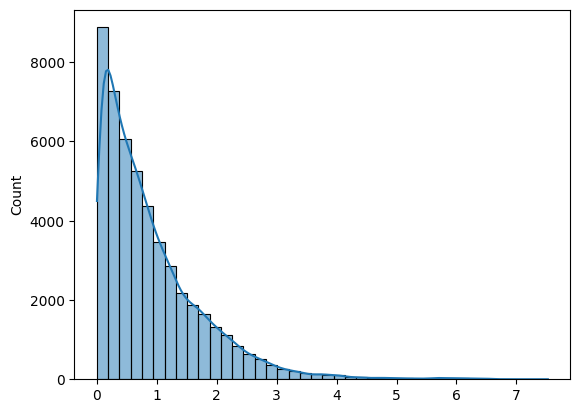

In [8]:
######################  TODO  ########################
sns.histplot(wait_times , bins = 40 ,kde= True);
######################  TODO  ########################

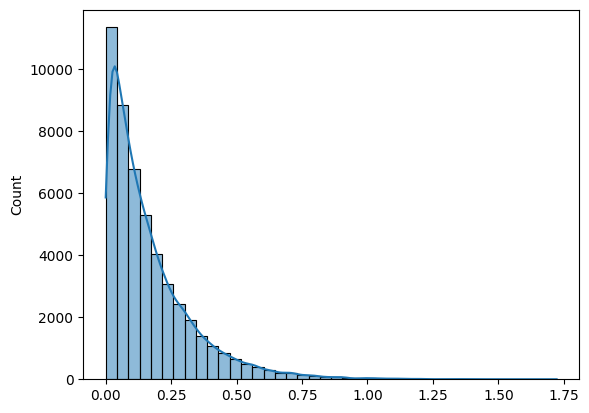

In [9]:
######################  TODO  ########################
sns.histplot(service_times, bins = 40 ,kde= True);
######################  TODO  ########################

## Plot the Joint Distributions

**Note:** Use `sns.jointplot` to plot the joint distributions

Based on the jointplots: Arrival times and wait times have no correlation (the scatter plot doesn't show any linear or neat behavior so correlation coefficient is near 0) the same thing happens with Arrival time and service time (no correlation). 

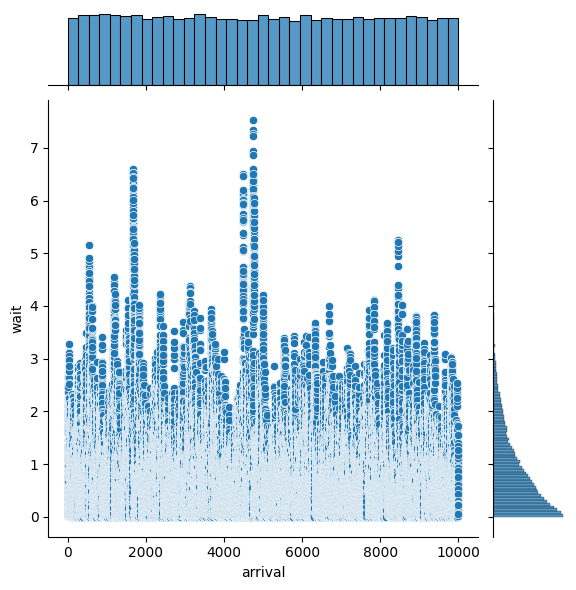

In [10]:
######################  TODO  ########################
# Joint Distribution of Arrival and Waiting Times
data = pd.DataFrame({'arrival':arrival_times , 'wait':wait_times})
sns.jointplot(x= 'arrival' , y= 'wait',data=data);
######################  TODO  ########################

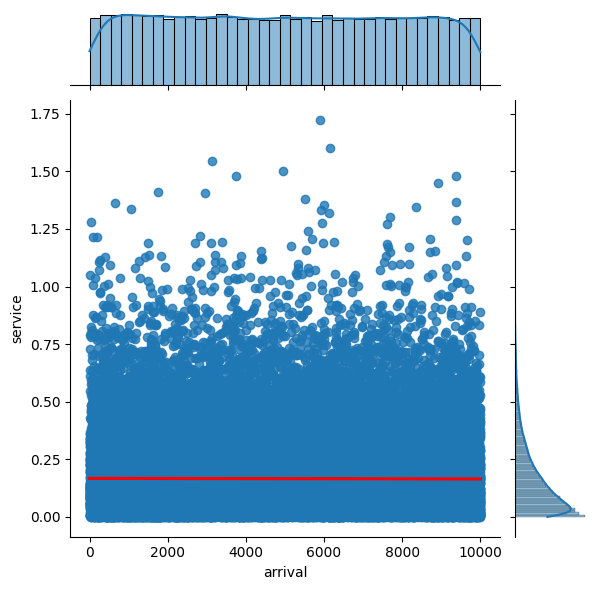

In [27]:
######################  TODO  ########################
# Joint Distribution of Arrival and Service Times
data2 = pd.DataFrame({'arrival':arrival_times , 'service':service_times})
sns.jointplot(x= 'arrival' , y= 'service',data=data2 ,kind='reg', line_kws={'color':'red'} );
######################  TODO  ########################

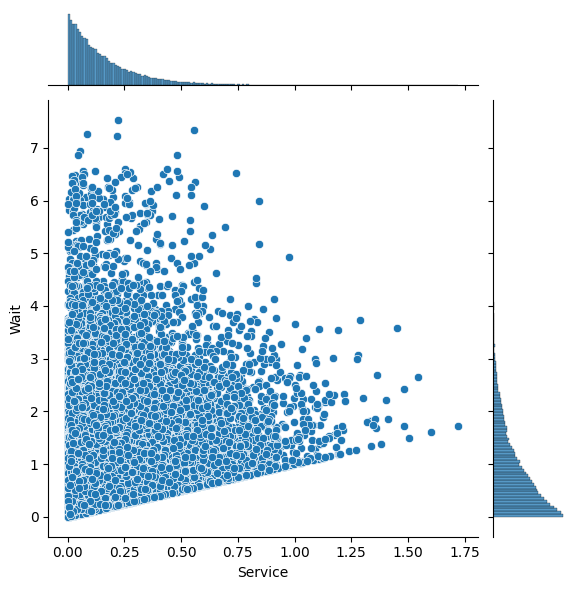

In [28]:
######################  TODO  ########################
#joint distribution between servicetime and wait time
data3=pd.DataFrame({'Service' : service_times , 'Wait' : wait_times})
sns.jointplot(x= 'Service' , y= 'Wait',data=data3 );
######################  TODO  ########################

## Analysis of Joint Distributions

TODO

## Scatter Plot and Correlation

we can calculate the correlation using the following equation :

Corr = cov(x,y)/std(x)*std(y)

using this formula we find that the correlation coefficient between arrival time and wait time is near zero(-0.07) showing no correlation as expected.

coorelation coeffecient between arrival times and waiting times is : -0.0748122948883964


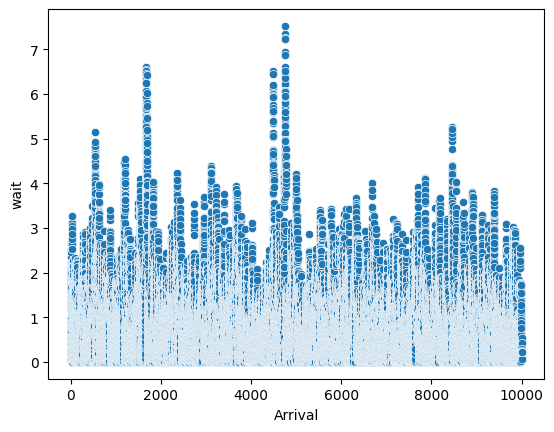

In [29]:
######################  TODO  ########################
# Scatter Plot of Arrival and Service Times
data4 = pd.DataFrame({'Arrival':arrival_times , 'wait':wait_times})
sns.scatterplot(data=data4 , x='Arrival' ,y= 'wait')
cov = np.cov(arrival_times ,wait_times)[1,0]
arrival_std = np.std(arrival_times)
wait_std = np.std(wait_times)
correlation_co = cov/(arrival_std*wait_std)
print(f"coorelation coeffecient between arrival times and waiting times is : {correlation_co}") 
######################  TODO  ########################

## Calculating `total_times`

Wait time is the time between service time and arrival time and the distribution between 2 poisson distribution (arrival and service) is exponential as the graphs shows.

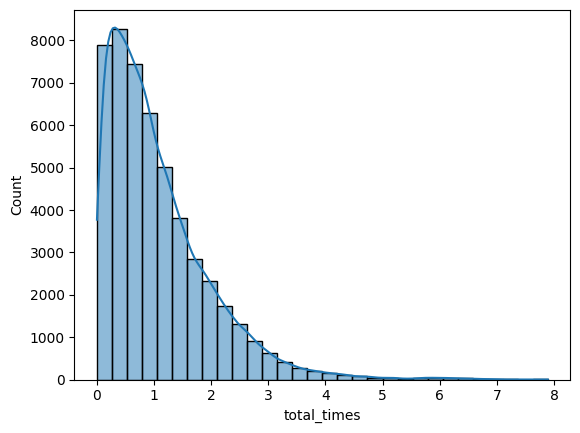

In [14]:
######################  TODO  ########################
# Distribution of Total Time Spent in the System
total_times = np.array(service_times) + np.array(wait_times)
sns.histplot(total_times ,bins=30 ,kde=True)
plt.xlabel("total_times");

######################  TODO  ########################

## Conditional Wait Times

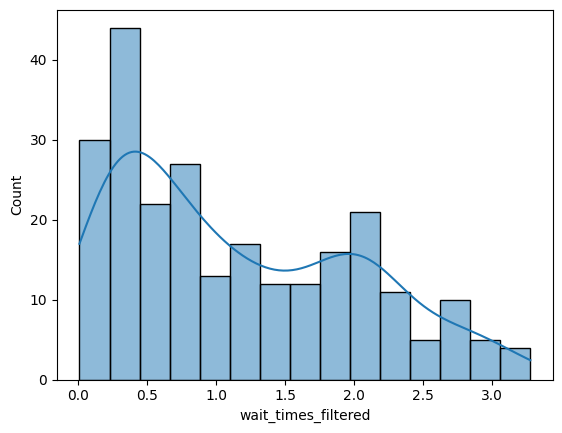

In [30]:
######################  TODO  ########################
# Conditional Distribution of Waiting Times (Arrival Time < 50)
service_times_filtered = np.array(service_times)[np.array(arrival_times) < 50]
wait_times_filtered = np.array(wait_times)[np.array(arrival_times) < 50]
sns.histplot(wait_times_filtered,bins=15,kde=True)
plt.xlabel("wait_times_filtered");
######################  TODO  ########################

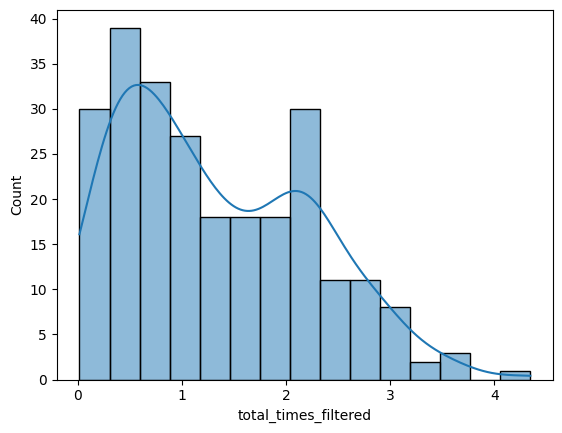

In [31]:
######################  TODO  ########################
# Conditional Distribution of Total Times (Arrival Time < 50)
total_times_filtered = np.array(wait_times_filtered)+np.array(service_times_filtered)
sns.histplot(total_times_filtered ,bins=15 ,kde=True)
plt.xlabel("total_times_filtered");
######################  TODO  ########################